## Nome: Elvis Felix Dantas

#Projeto - Analisando o engajamento do Instagram



O que queremos saber:

 * Qual o tipo de conteúdo que mais engaja(curtidas comentários e interações)?

* Base instagram que usuario começou postar na marca até 27/março
* Vamos ignorar a colula de visualizaçoes.
* Tratar colunas vazias que não possuio tag








In [3]:
# importar pamdas
import pandas as pd
# importar numpy
import numpy as np



In [4]:
# importar base do excel
df_Instagram = pd.read_excel("baseInstagram.xlsx")


In [5]:
# vizualizr as 10 primeiras linhas
df_Instagram.head(10)

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,82878.0,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437
5,Foto,2021-09-17,5359,62,NaN,Novos Produtos,N,S,S,5421
6,Foto,2021-09-19,21597,852,NaN,Novos Produtos,S,S,NaN,22449
7,Foto,2021-09-25,6346,33,NaN,Produtos,N,S,NaN,6379
8,Foto,2021-09-27,6355,89,NaN,Produtos,S,N,S,6444
9,Vídeo,2021-09-28,4056,81,73174.0,Produtos,N,N,NaN,4137


 Obs. (base.drop(nome)coluna.axis=1)
O axis = 1 se refere a coluna, enquanto axis = 0 se refere a linha
- Devemos passar o nome da coluna que queremos apagar da base
- Em caso de mais de 1 coluna, passamos a lista entre colchetes

In [6]:
# vamos excluir a tabela vizualizações
df_Instagram = df_Instagram.drop("Visualizações", axis=1)

In [7]:
# vizualizar as 5 primeiras linhas
df_Instagram.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [8]:
# vizualizar as 5 ultimas linhas
df_Instagram.tail()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
47,IGTV,2022-03-12,5489,77,Dicas de como usar/Novos Produtos,S,N,NaN,5566
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,NaN,29563
49,Foto,2022-03-22,9087,106,NaN,S,S,NaN,9193
50,Foto,2022-03-26,16551,186,NaN,S,N,NaN,16737
51,IGTV,2022-03-27,4934,65,Dicas de como usar/Produtos,S,N,NaN,4999


In [9]:
# vizualizar o tamanho da base
df_Instagram.shape

(52, 9)

In [10]:
# verificando as informações da base
df_Instagram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tipo         52 non-null     object        
 1   Data         52 non-null     datetime64[ns]
 2   Curtidas     52 non-null     int64         
 3   Comentários  52 non-null     int64         
 4   Tags         44 non-null     object        
 5   Pessoas      52 non-null     object        
 6   Campanhas    52 non-null     object        
 7   Carrossel    8 non-null      object        
 8   Interacoes   52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


# Na coluna Carrocel possui apenas 8 valores NÂO nulos
 - vamos entender esses dados dessa coluna

In [11]:
# Buscando valores que NÂO são nulos
df_Instagram.value_counts()

Tipo  Data        Curtidas  Comentários  Tags                 Pessoas  Campanhas  Carrossel  Interacoes 
Foto  2021-09-17  5359      62           Novos Produtos       N        S          S          5421           1
      2021-09-27  6355      89           Produtos             S        N          S          6444           1
      2021-10-21  6166      55           Novos Produtos       S        S          S          6221           1
      2021-12-23  8328      93           Produtos             S        N          S          8421           1
      2022-01-02  12193     138          Novos Produtos       S        N          S          12331          1
      2022-01-08  24585     354          Datas comemorativas  S        S          S          24939          1
      2022-01-15  9936      119          Novos Produtos       S        N          S          10055          1
      2022-02-21  21621     213          Influenciadores      S        S          S          21834          1
Name: count, dt

Identificamos que os valores nulos são de postagens que não sao carrossel. Sendo assim o nulo deveria ser "N"

# Tratando valores nulos

In [12]:
# filtrando os valores em que carrossel é nulo
df_Instagram.loc[df_Instagram.Carrossel.isnull()].head(10)

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437
6,Foto,2021-09-19,21597,852,Novos Produtos,S,S,NaN,22449
7,Foto,2021-09-25,6346,33,Produtos,N,S,NaN,6379
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,NaN,4137
10,Reels,2021-10-10,12894,249,Trends/Produtos,S,N,NaN,13143
11,Foto,2021-10-12,17831,391,NaN,S,S,NaN,18222


In [13]:
# filtrando os valores em que NÃO são nulos
df_Instagram.loc[df_Instagram.Carrossel.notnull()].head(10)

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
5,Foto,2021-09-17,5359,62,Novos Produtos,N,S,S,5421
8,Foto,2021-09-27,6355,89,Produtos,S,N,S,6444
12,Foto,2021-10-21,6166,55,Novos Produtos,S,S,S,6221
21,Foto,2021-12-23,8328,93,Produtos,S,N,S,8421
25,Foto,2022-01-02,12193,138,Novos Produtos,S,N,S,12331
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939
28,Foto,2022-01-15,9936,119,Novos Produtos,S,N,S,10055
40,Foto,2022-02-21,21621,213,Influenciadores,S,S,S,21834


In [14]:
# selecionando apenas a coluna Carrossel e atribuindo um valor "N"
df_Instagram.loc[df_Instagram.Carrossel.isnull(), "Carrossel"] = "N"

In [15]:
# visualisando a base novamente
df_Instagram.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437


Verificando novamente os valores da colula Carrossel

In [16]:
# filtrando novamente para verificar se ainda existe valores nulos
df_Instagram.loc[df_Instagram.Carrossel.isnull()].head(10)

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes


In [ ]:
# verificando informações da base
df_Instagram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tipo         52 non-null     object        
 1   Data         52 non-null     datetime64[ns]
 2   Curtidas     52 non-null     int64         
 3   Comentários  52 non-null     int64         
 4   Tags         44 non-null     object        
 5   Pessoas      52 non-null     object        
 6   Campanhas    52 non-null     object        
 7   Carrossel    52 non-null     object        
 8   Interacoes   52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


In [17]:
df_Instagram.Carrossel.value_counts()

Carrossel
N    44
S     8
Name: count, dtype: int64

# Mostrando as informações estatística

In [18]:
# Gera estatísticas descritivas
df_Instagram.describe()

,Data,Curtidas,Comentários,Interacoes
count,52,52.000000,52.000000,52.000000
mean,2021-12-23 04:36:55.384615424,12262.730769,189.500000,12452.230769
min,2021-09-11 00:00:00,2807.000000,9.000000,2816.000000
25%,2021-10-23 06:00:00,5492.000000,69.500000,5562.500000
50%,2022-01-05 00:00:00,9603.000000,128.000000,9773.500000
75%,2022-02-15 12:00:00,17621.750000,265.250000,17920.750000
max,2022-03-27 00:00:00,37351.000000,852.000000,37853.000000
std,NaN,8165.875326,170.687709,8299.390088


In [19]:
# Filtrando valores nulos em Tags
df_Instagram[df_Instagram.Tags.isnull()]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
11,Foto,2021-10-12,17831,391,NaN,S,S,N,18222
19,Foto,2021-12-12,16086,268,NaN,S,S,N,16354
29,Foto,2022-01-19,8612,142,NaN,S,N,N,8754
38,Foto,2022-02-15,17687,213,NaN,S,N,N,17900
41,Foto,2022-02-22,12530,90,NaN,S,N,N,12620
43,Foto,2022-03-04,24399,266,NaN,S,S,N,24665
49,Foto,2022-03-22,9087,106,NaN,S,S,N,9193
50,Foto,2022-03-26,16551,186,NaN,S,N,N,16737


Como podemos ver na consulta acima Existe Tags NaN (sem valor). Vamos consultar todos esse valores e colocar "Sem Tag", posteriormente tratar esses dados.

In [20]:
# vamos consultar os valores em que a Tag é nula
df_Instagram.loc[df_Instagram.Tags.isnull(), "Tags"]

11    NaN
19    NaN
29    NaN
38    NaN
41    NaN
43    NaN
49    NaN
50    NaN
Name: Tags, dtype: object

In [21]:
# Atribuindo o texto Sem Tag para as colunas onde a tag é NaN
df_Instagram.loc[df_Instagram.Tags.isnull(), "Tags"] = "Sem Tag"

In [22]:
# Vizualizando novamente a todas as colunas tags nao nula
df_Instagram[df_Instagram.Tags.notnull()]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437
5,Foto,2021-09-17,5359,62,Novos Produtos,N,S,S,5421
6,Foto,2021-09-19,21597,852,Novos Produtos,S,S,N,22449
7,Foto,2021-09-25,6346,33,Produtos,N,S,N,6379
8,Foto,2021-09-27,6355,89,Produtos,S,N,S,6444
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,N,4137


In [23]:
# Mostrando novamente a tabela de curtidas por tag
df_Instagram.groupby("Tags")[["Curtidas","Comentários"]].mean().sort_values("Curtidas",ascending=False)

,Curtidas,Comentários
Tags,,
Datas comemorativas/Promoções,29084.000000,479.000000
Promoções,26645.500000,557.000000
Trends,22400.666667,386.666667
Datas comemorativas,17975.000000,298.333333
Sem Tag,15347.875000,207.750000
Influenciadores,15197.285714,161.714286
Trends/Produtos,12894.000000,249.000000
Novos Produtos,11619.571429,227.714286
Dicas de como usar/Produtos,7586.666667,158.333333



A primeira coisa é pegar os 5 primeiros registros com mais e menos curtidas

In [24]:
# Ordenando os valores de forma ascendente
df_Instagram.sort_values(by="Curtidas", ascending=True).head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273


In [25]:
# Ordenando os valores de forma descendente
df_Instagram.sort_values(by="Curtidas", ascending=False).tail()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816


In [26]:
# Agrupando por Tags e Calcular a Média
df_Instagram.groupby("Tags")["Curtidas"].mean()

Tags
Datas comemorativas                  17975.000000
Datas comemorativas/Promoções        29084.000000
Dicas de como usar/Novos Produtos     5703.500000
Dicas de como usar/Produtos           7586.666667
Influenciadores                      15197.285714
Loja                                  2832.500000
Loja/Produtos                         2930.000000
Novos Produtos                       11619.571429
Produtos                              5666.916667
Promoções                            26645.500000
Sem Tag                              15347.875000
Trends                               22400.666667
Trends/Produtos                      12894.000000
Name: Curtidas, dtype: float64

- Podemos observar que no top 5, todas as postagens tinham pessoas e eram fotos de campanha (Pessoas = S)
- Nas 5 piores postagens, não tinham pessoas e nem eram postagens de campanhas

- ** Isso pode ser um indicador que pessoas e campanhas tem relação com as curtidas**

## Para melhor entendimento, vamos fazer agrupamentos e consultas para entendimento das relações entre as Tags e verificar a media geral

In [27]:
# Agrupando as informações por Pessoas e calculando a média de Curtidas
df_Instagram.groupby(["Tipo", "Pessoas"])["Curtidas"].mean()

Tipo   Pessoas
Foto   N           3863.500000
       S          15236.666667
IGTV   S           6833.400000
Reels  N           5934.500000
       S          20832.000000
Vídeo  N           4007.500000
       S          16409.500000
Name: Curtidas, dtype: float64

In [28]:
# Agrupando as informações por tipo e Pessoas e calculando a media de curtidas e comentários
df_Instagram.groupby(["Tipo", "Pessoas"])[["Curtidas", "Comentários"]].mean()

Curtidas  Comentários
Tipo  Pessoas                           
Foto  N         3863.500000        29.50
      S        15236.666667       226.20
IGTV  S         6833.400000       133.60
Reels N         5934.500000        98.00
      S        20832.000000       342.00
Vídeo N         4007.500000        65.25
      S        16409.500000       370.00

In [29]:
# Agrupando as informações por tipo e Pessoas e calculando a media de curtidas e comentários
df_Instagram.groupby(["Tipo", "Pessoas", "Campanhas"])[["Curtidas", "Comentários"]].mean()

Curtidas  Comentários
Tipo  Pessoas Campanhas                           
Foto  N       N           2869.000000    20.500000
              S           5852.500000    47.500000
      S       N          10815.285714   159.928571
              S          19105.375000   284.187500
IGTV  S       N           6833.400000   133.600000
Reels N       N           5934.500000    98.000000
      S       N          12894.000000   249.000000
              S          24801.000000   388.500000
Vídeo N       N           4007.500000    65.250000
      S       S          16409.500000   370.000000

In [30]:
# Agrupando as informações  Pessoas e calculando a media de curtidas e comentários
df_Instagram.groupby(["Pessoas"])[["Curtidas", "Comentários"]].mean()

,Curtidas,Comentários
Pessoas,,
N,4256.666667,52.833333
S,14664.550000,230.500000


* Podemos ver na consulta acima é que postagens com pessoas engajam muito, sendo superior quando não tem pessoas. Vamos ver graficamente abaixo

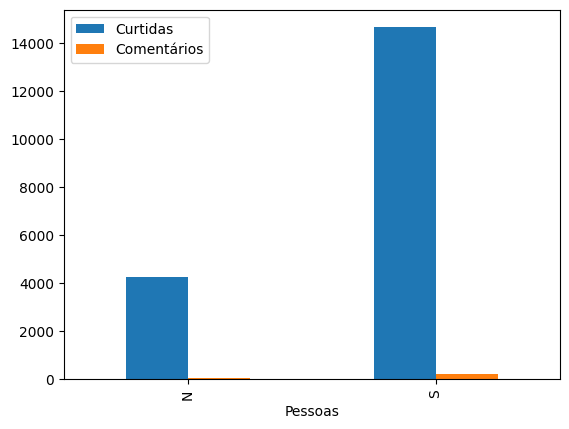

In [31]:
# vericando postagem com pessoas S ou N em forma de gráficos.
df_Instagram.groupby(["Pessoas"])[["Curtidas", "Comentários"]].mean().plot.bar();

In [32]:
# podemos filtrar a base, filtrando o tipo Foto
df_Instagram[df_Instagram.Tipo == "Foto"].groupby(["Carrossel"])[["Curtidas", "Comentários"]].mean()

,Curtidas,Comentários
Carrossel,,
N,13776.357143,208.571429
S,11817.875000,140.375000


In [33]:
# Agregando por pessoas e campanhas
df_Instagram.groupby(["Pessoas", "Campanhas"])[["Curtidas", "Comentários"]].mean()

Curtidas  Comentários
Pessoas Campanhas                       
N       N           3937.50         53.9
        S           5852.50         47.5
S       N           9923.75        157.8
        S          19405.35        303.2

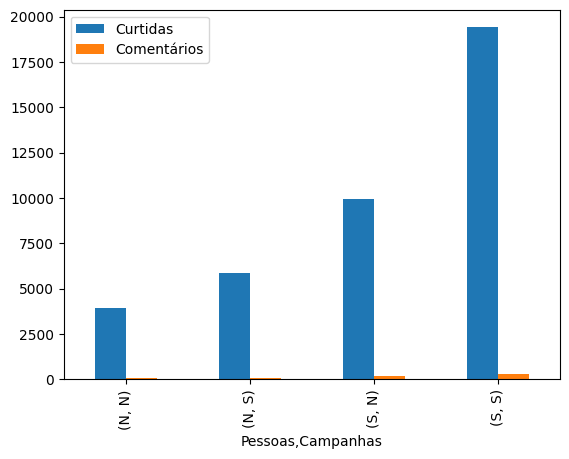

In [34]:
# Agregando por pessoas e campanhas em forma de graficos
df_Instagram.groupby(["Pessoas", "Campanhas"])[["Curtidas", "Comentários"]].mean().plot.bar();

In [ ]:

# Também podemos agrupar por Pessoas e Tags
df_Instagram.groupby(["Pessoas","Tags"])[["Curtidas","Comentários"]].mean().sort_values("Curtidas",ascending=False)

Curtidas  Comentários
Pessoas Tags                                                        
S       Datas comemorativas/Promoções      29084.000000   479.000000
        Promoções                          26645.500000   557.000000
        Trends                             22400.666667   386.666667
        Datas comemorativas                17975.000000   298.333333
        Sem Tag                            15347.875000   207.750000
        Influenciadores                    15197.285714   161.714286
        Trends/Produtos                    12894.000000   249.000000
        Novos Produtos                     12663.000000   255.333333
        Produtos                            7719.250000    82.250000
        Dicas de como usar/Produtos         7586.666667   158.333333
        Dicas de como usar/Novos Produtos   5703.500000    96.500000
N       Novos Produtos                      5359.000000    62.000000
        Produtos                            4640.750000    64.875000
        Loja/Produtos                       2930.000000    28.000000
        Loja                                2832.500000    12.500000

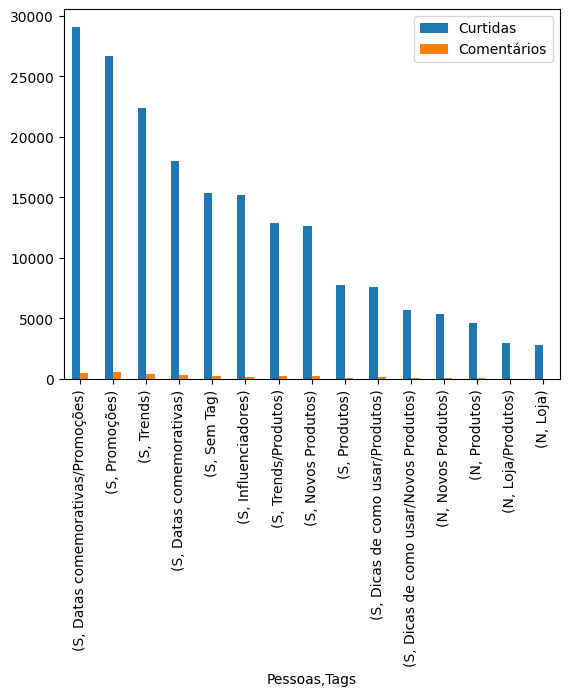

In [35]:

# Também podemos agrupar por Pessoas e Tags em forma de gráficos
df_Instagram.groupby(["Pessoas","Tags"])[["Curtidas","Comentários"]].mean().sort_values("Curtidas",ascending=False).plot.bar();

# Vamos filtrar para entender porque a média de vídeos foi baixa

In [ ]:
# filtrando apenas o tipo Video
df_Instagram[df_Instagram.Tipo == "Vídeo"]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,N,4137
15,Vídeo,2021-11-04,3646,71,Produtos,N,N,N,3717
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
24,Vídeo,2021-12-30,17600,383,Trends,S,S,N,17983
37,Vídeo,2022-02-13,15219,357,Datas comemorativas,S,S,N,15576


Então podemos observar que:
*   Ter o rosto de outras pessoas é fundamental para um bom engajamento na publicação
Em todas as tags, quando havia o rosto, o resultado foi muito melhor
*   A média quando tem pessoas e faz parte de publicação de campanhas é de cerca de 19,4 mil curtidas

*   já quando é apenas pessoas (sem campanha) passa para quase 10 mil e se não tiver pessoas chega no máximo a 5,9 mil mesmo em campanhas


 **Como cientista de dados, podemos mostrar para a empresa a importância de incluir pessoas usando os seus produtos, o que gera um aumento considerável no engajamento**


Em relação a postagens de videos podemos observar que:

*   Percebemos que loja postou 4 videos mostrando seus produtos (sem nenhuma pessoa) e o resultado foi baixo e isso prejudicou a Média Geral

*   Quando os vídeos foram feitos com pessoas (linha 24 e 37) aproveitando trends e datas comemorativas (TAGS) teve muitas curtidas e o resultado foi ótimo.

Conclusões
- **Em uma análise inicial, percebemos que postagens que incluia pessoas engajam muito mais que aquelas que não possui ninguém**
- **Postagens em épocas de campanha também possuem um melhor engajamento**
- **Nesse análise, percebemos que o carrossel não foi um diferencial para melhorar o engajamento da marca**